In [1]:
import pandas as pd
import numpy as np
#from stable_baselines3 import SAC, PPO
#import KBMproject.utilities as utils
#import torch
import matplotlib.pyplot as plt

%matplotlib inline

Increase the default sizes of all labels:

In [2]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'legend.fontsize': 'x-large'}
pylab.rcParams.update(params)

In [3]:
A_MAX = 1.0
A_MIN = -1.0
DAYS = 7
PERIOD = 24*DAYS
START=0

Load actors in eval mode

In [4]:
# agent_d = PPO.load('20 bin PPO 500 results\default_PPO_citylearn_challenge_2022_phase_2_Building_6_20_bins_500.zip')
# actor_d = utils.extract_actor(agent_d)
# actor_d.eval()

# agent_c = SAC.load('Models\Victim\SAC_citylearn_challenge_2022_phase_2_Building_6_default_rwd_MARLISA_hyperparams_500.zip')
# actor_c = utils.extract_SACtor(agent_c)
# actor_c.eval()

Load observations

In [5]:
# df_obs_d = pd.read_csv(
#     r'20 bin PPO 500 results\untargeted_myPGD_05_obs.csv',
#     index_col=0,
# ).astype('float32')
# df_adv_obs_d = pd.read_csv(
#     r'20 bin PPO 500 results\untargeted_myPGD_05_adv_obs.csv',
#     index_col=0,
# ).astype('float32')
#load just the action column instead (after generating them)
# df_obs_c = pd.read_csv(
#     r'default SAC 500 norm space results\untargeted_myPGD_obs.csv',
#     index_col=0,
# ).astype('float32')
# df_adv_obs_c = pd.read_csv(
#     r'default SAC 500 norm space results\untargeted_myPGD_adv_obs.csv',
#     index_col=0,
# ).astype('float32')

Generat agent actions from clean and adversarial observations

In [6]:
# df_a = pd.DataFrame({}) #columns should be 1d lists
# with torch.no_grad(): #makes computation faster, and we don't need these for evaluation
#     df_a['discrete_clean_actions'] = np.argmax( #prediction returns n logits, we want the action corresponding to the max logit
#                                             actor_d(
#                                                 torch.from_numpy(
#                                                     df_obs_d.to_numpy()
#                                                 ).to(agent_d.device)
#                                             ).cpu().detach().numpy(),
#                                         axis=1)
#     df_a['discrete_adv_actions'] = np.argmax(
#                                             actor_d(
#                                                 torch.from_numpy(
#                                                     df_adv_obs_d.to_numpy()
#                                                 ).to(agent_d.device)
#                                             ).cpu().detach().numpy(),
#                                         axis=1)
#don't need these if we just run the experement again
    # df_a['continuous_clean_actions'] = actor_c( #this is a 2d tensor, since we aren't using argmax as this is a regressor, we need numpy's .flatten for a 1d list at the end
    #                                         torch.from_numpy(
    #                                             df_obs_c.to_numpy()
    #                                         ).to(agent_d.device)
    #                                     ).cpu().detach().numpy().flatten().tolist()
    # df_a['continuous_adv_actions'] = actor_c(
    #                                         torch.from_numpy(
    #                                             df_adv_obs_c.to_numpy()
    #                                         ).to(agent_d.device)
    #                                     ).cpu().detach().numpy().flatten().tolist()

In [7]:
df_a = pd.read_csv(r'20 bin PPO 500 results\untargeted_myPGD_05_obs-a.csv',
            usecols=['a'])
df_a.columns = ['discrete_clean_actions']
df_a['discrete_adv_actions'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_myPGD_05_adv_obs-a.csv',
            usecols=['a'])
df_a['discrete_bifurcation_clean_actions'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_binary_myPGD_05_obs-a.csv',
            usecols=['a'])
df_a['discrete_bifurcation_adv_actions'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_binary_myPGD_05_adv_obs-a.csv',
            usecols=['a'])
df_a['discrete_toggle_clean_actions'] = pd.read_csv(r'20 bin PPO 500 results\toggle_binary_myPGD_05_obs-a.csv',
            usecols=['a'])
df_a['discrete_toggle_adv_actions'] = pd.read_csv(r'20 bin PPO 500 results\toggle_binary_myPGD_05_adv_obs-a.csv',
            usecols=['a'])


map discrete actions to [-1,1]

In [8]:
df_a.replace(dict(
                enumerate(
                    np.linspace(A_MIN,A_MAX,20)
                    )
                ),
            inplace=True)

map continuous actions from [-0.78125], [0.78125] to [-1,1], acutally don,t just run myPGD again

In [9]:
df_a['continuous_clean_actions'] = pd.read_csv(r'default SAC 500 norm space results\untargeted_myPGD_05_mse_obs-a.csv',
            usecols=['a'])

In [10]:
df_a['continuous_adv_actions'] = pd.read_csv(r'default SAC 500 norm space results\untargeted_myPGD_05_mse_adv_obs-a.csv',
            usecols=['a'])

In [11]:
df_a['continuous_bifurcation_clean_actions'] = pd.read_csv(r'default SAC 500 norm space results\untargeted_binary_myPGD_5%_obs-a.csv',
            usecols=['a'])
df_a['continuous_bifurcation_adv_actions'] = pd.read_csv(r'default SAC 500 norm space results\untargeted_binary_myPGD_5%_adv_obs-a.csv',
            usecols=['a'])
df_a['continuous_toggle_clean_actions'] = pd.read_csv(r'default SAC 500 norm space results\toggle_binary_myPGD_5%_obs-a.csv',
            usecols=['a'])
df_a['continuous_toggle_adv_actions'] = pd.read_csv(r'default SAC 500 norm space results\toggle_binary_myPGD_5%_adv_obs-a.csv',
            usecols=['a'])


continuous actions [0,1] -> [-1,1]

In [12]:
cont_mask = df_a.columns[df_a.columns.str.contains('cont')]
#bi_mask = df_a.columns[df_a.columns.str.contains('bifurcation')]
df_a[cont_mask] = df_a[cont_mask]*2 - 1

Stats:

In [13]:
print(f'The ASR for the discrete agent is {format((df_a["discrete_clean_actions"] != df_a["discrete_adv_actions"]).mean(), ".3f")}')

The ASR for the discrete agent is 0.408


In [14]:
discrete_sign_flip = (np.sign(df_a['discrete_clean_actions']) != np.sign(df_a['discrete_adv_actions'])).mean()
cont_sign_flip = (np.sign(df_a['continuous_clean_actions']) != np.sign(df_a['continuous_adv_actions'])).mean()
bi_sign_flip = (np.sign(df_a['continuous_bifurcation_clean_actions']) != np.sign(df_a['continuous_bifurcation_adv_actions'])).mean()
d_bi_sign_flip = (np.sign(df_a['discrete_bifurcation_clean_actions']) != np.sign(df_a['discrete_bifurcation_adv_actions'])).mean()

print(f'The (dis)charge was reversed {format(cont_sign_flip, ".3f")} of the time for the continuous agent, compared to {format(discrete_sign_flip, ".3f")} for discrete, or {format(cont_sign_flip/discrete_sign_flip, ".3f")} times more')
print(f'The bifurcation attack on the continuous agent reversed the (dis)charge decision {format(bi_sign_flip, ".3f")} of the time, or {format(bi_sign_flip/cont_sign_flip, ".3f")} times more thean the PGD alone on the continuous agent')
print(f'The bifurcation attack on the continuous agent reversed the (dis)charge decision {format(d_bi_sign_flip, ".3f")} of the time')

The (dis)charge was reversed 0.274 of the time for the continuous agent, compared to 0.042 for discrete, or 6.492 times more
The bifurcation attack on the continuous agent reversed the (dis)charge decision 0.957 of the time, or 3.489 times more thean the PGD alone on the continuous agent
The bifurcation attack on the continuous agent reversed the (dis)charge decision 0.261 of the time


With an ASR of 0.41 and a  sign flip rate of 0.04 for the discrete agent, my PGD only reversed the (dis)charge with 0.1 of the successful attacks 

In [15]:
print(f'MAE for transformed discrete agent actions:{format((df_a["discrete_clean_actions"] - df_a["discrete_adv_actions"]).abs().mean(), ".3f")}')
print(f'MAE for transformed continuous agent actions:{format((df_a["continuous_clean_actions"] - df_a["continuous_adv_actions"]).abs().mean(), ".3f")}')
print(f'MAE for transformed continuous bifurcated agent actions:{format((df_a["continuous_bifurcation_clean_actions"] - df_a["continuous_bifurcation_adv_actions"]).abs().mean(), ".3f")}')
print(f'MAE for transformed continuous bifurcated agent actions:{format((df_a["discrete_bifurcation_clean_actions"] - df_a["discrete_bifurcation_adv_actions"]).abs().mean(), ".3f")}')

MAE for transformed discrete agent actions:0.126
MAE for transformed continuous agent actions:0.538
MAE for transformed continuous bifurcated agent actions:0.957
MAE for transformed continuous bifurcated agent actions:0.266


The transformed MAE is 4x high for the continuous agent than the discrete.

In [16]:
discrete_mask = df_a.columns[df_a.columns.str.contains('discrete')]

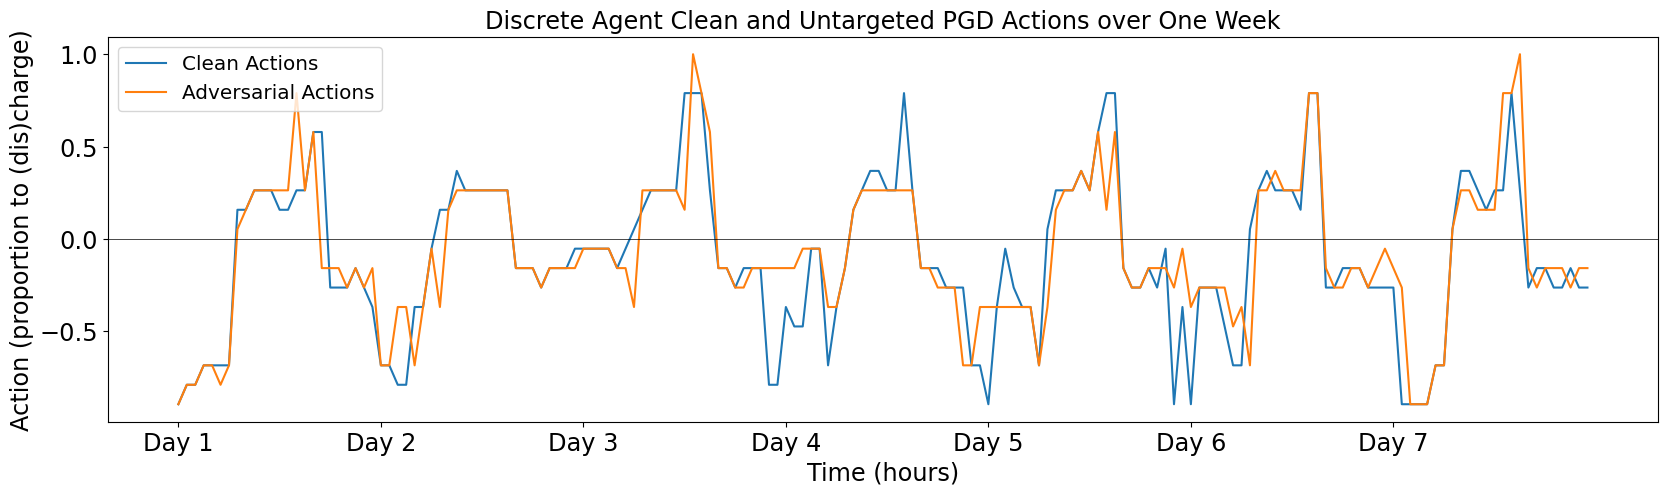

In [17]:
start = 0*7*24
ax = df_a[['discrete_clean_actions','discrete_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
    ylabel='Action (proportion to (dis)charge)',
    title='Discrete Agent Clean and Untargeted PGD Actions over One Week',
    xlabel='Time (hours)',
    )
ax.set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
ax.legend(['Clean Actions','Adversarial Actions'])
plt.axhline(0, color='black', linewidth=0.5)

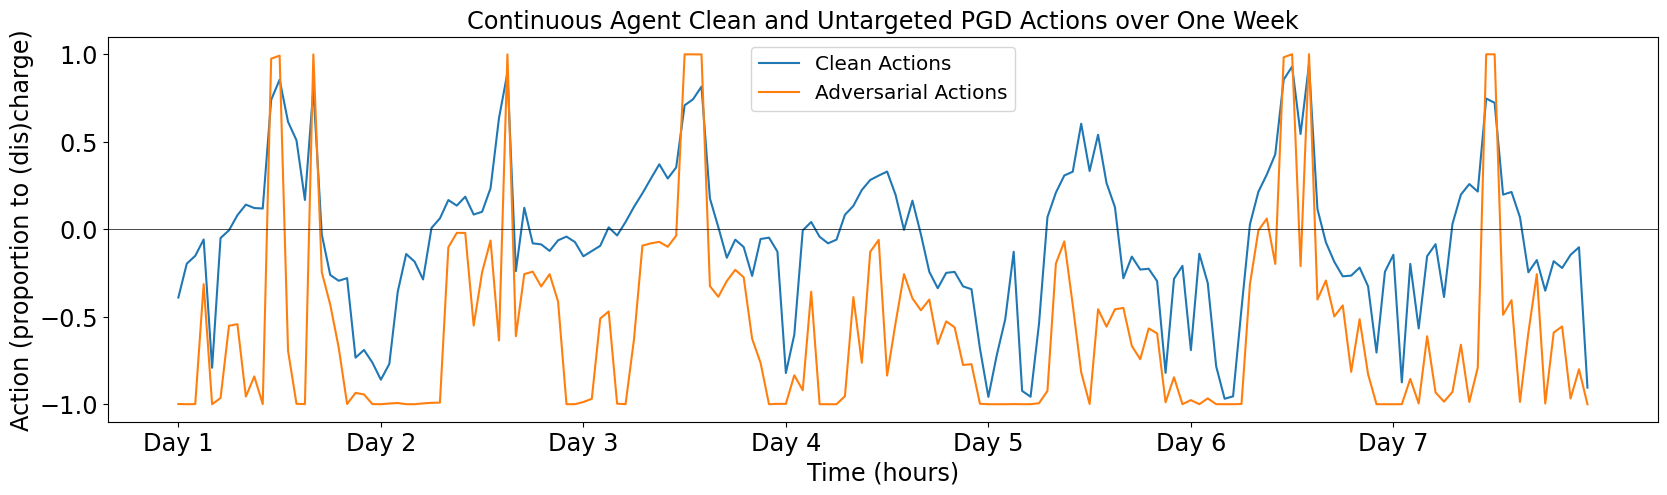

In [18]:
start = 0*7*24
ax = df_a[['continuous_clean_actions','continuous_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
    ylabel='Action (proportion to (dis)charge)',
    title='Continuous Agent Clean and Untargeted PGD Actions over One Week',
    xlabel='Time (hours)'
    )
ax.set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
ax.legend(['Clean Actions','Adversarial Actions'])
plt.axhline(0, color='black', linewidth=0.5)

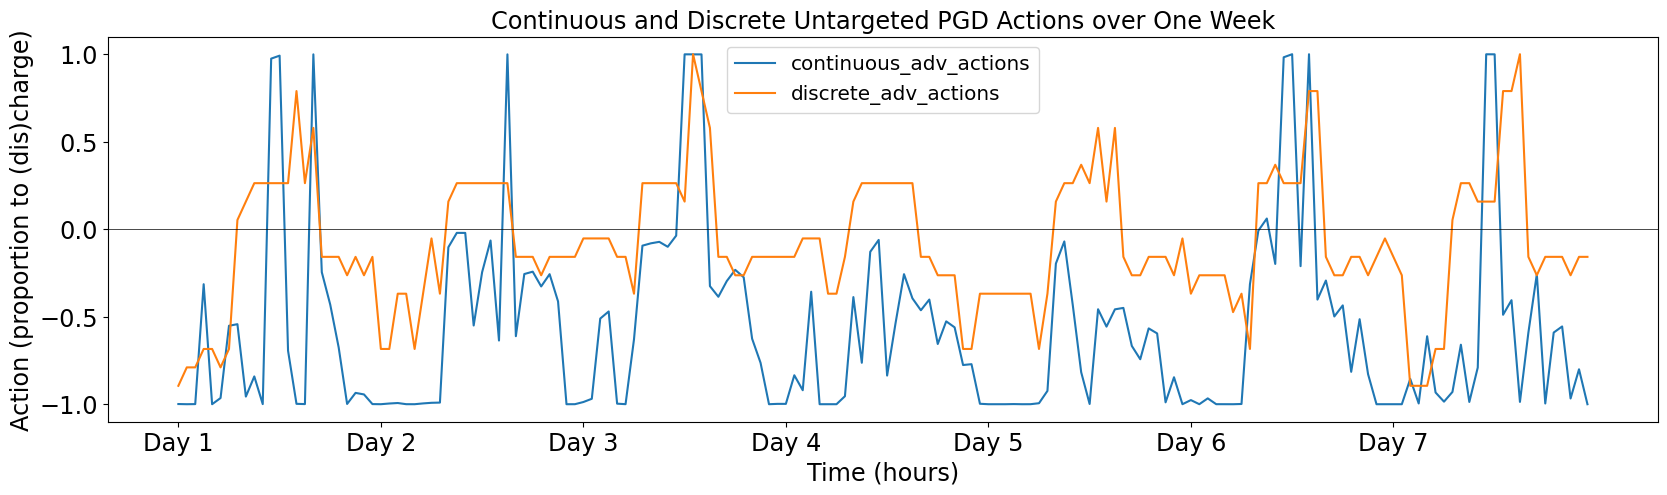

In [19]:
start = 0*7*24
df_a[['continuous_adv_actions','discrete_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
    ylabel='Action (proportion to (dis)charge)',
    title='Continuous and Discrete Untargeted PGD Actions over One Week',
    xlabel='Time (hours)'
    ).set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
plt.axhline(0, color='black', linewidth=0.5)

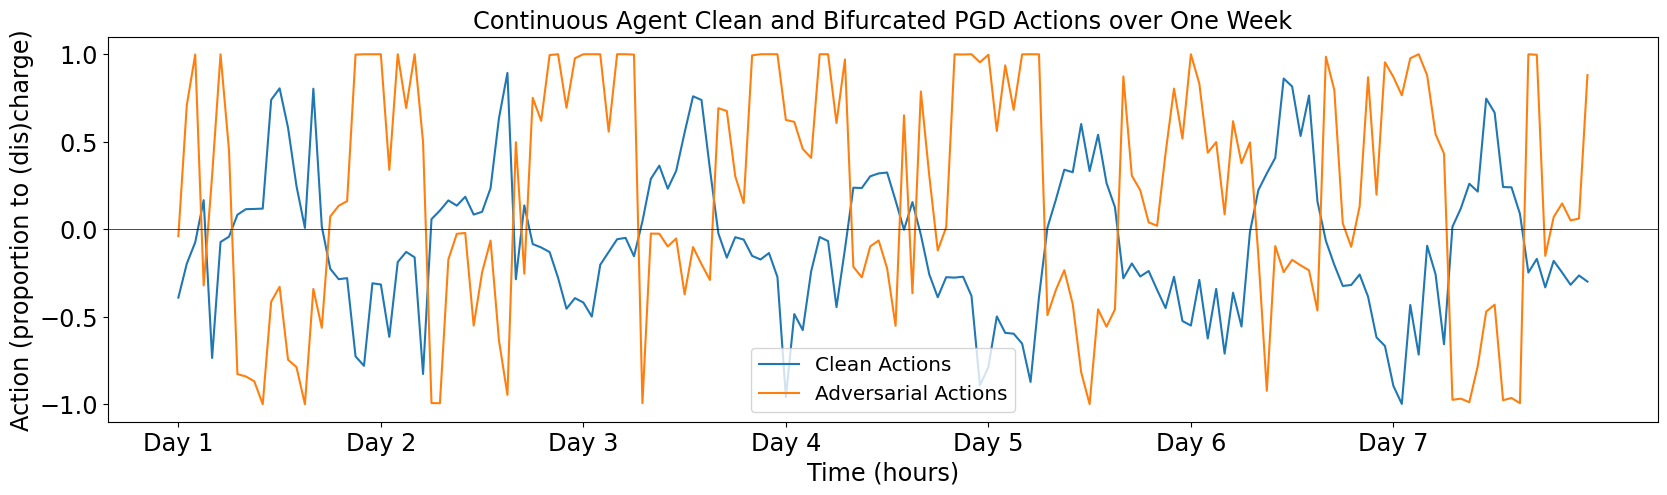

In [20]:
start = 0*7*24
ax = df_a[['continuous_bifurcation_clean_actions','continuous_bifurcation_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
    ylabel='Action (proportion to (dis)charge)',
    title='Continuous Agent Clean and Bifurcated PGD Actions over One Week',
    xlabel='Time (hours)'
    )
ax.set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
ax.legend(['Clean Actions','Adversarial Actions'])
plt.axhline(0, color='black', linewidth=0.5)

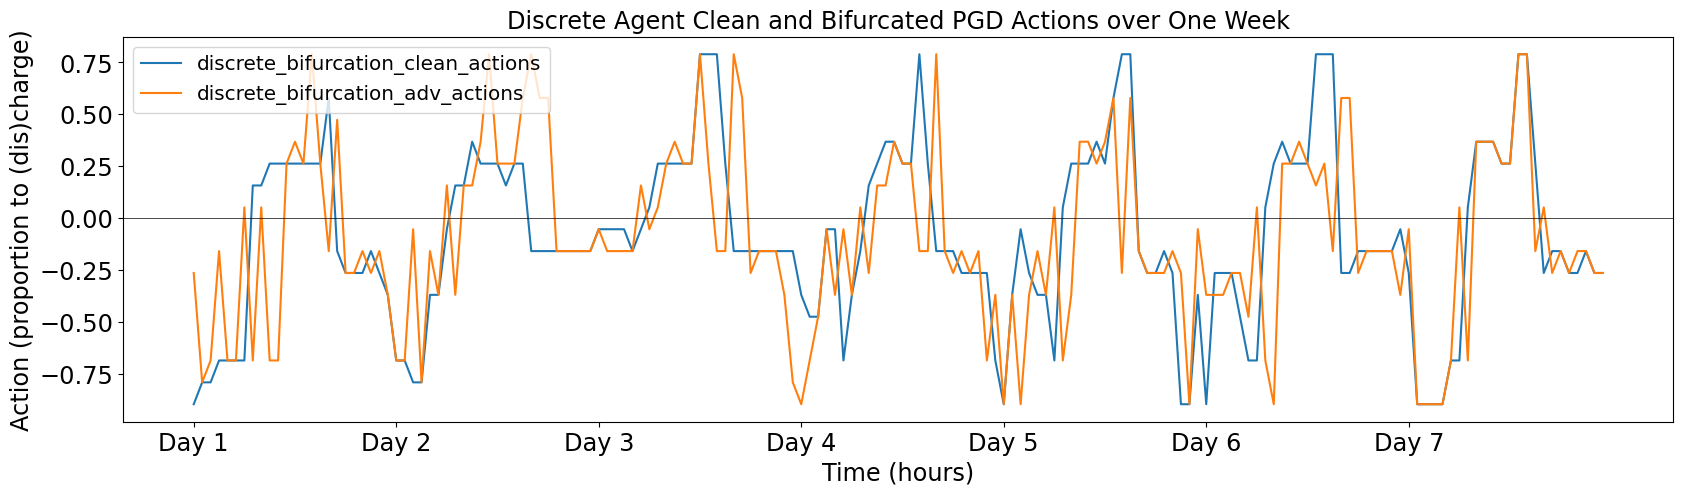

In [21]:
start = 0*7*24
df_a[['discrete_bifurcation_clean_actions','discrete_bifurcation_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
    ylabel='Action (proportion to (dis)charge)',
    title='Discrete Agent Clean and Bifurcated PGD Actions over One Week',
    xlabel='Time (hours)'
    ).set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
plt.axhline(0, color='black', linewidth=0.5)

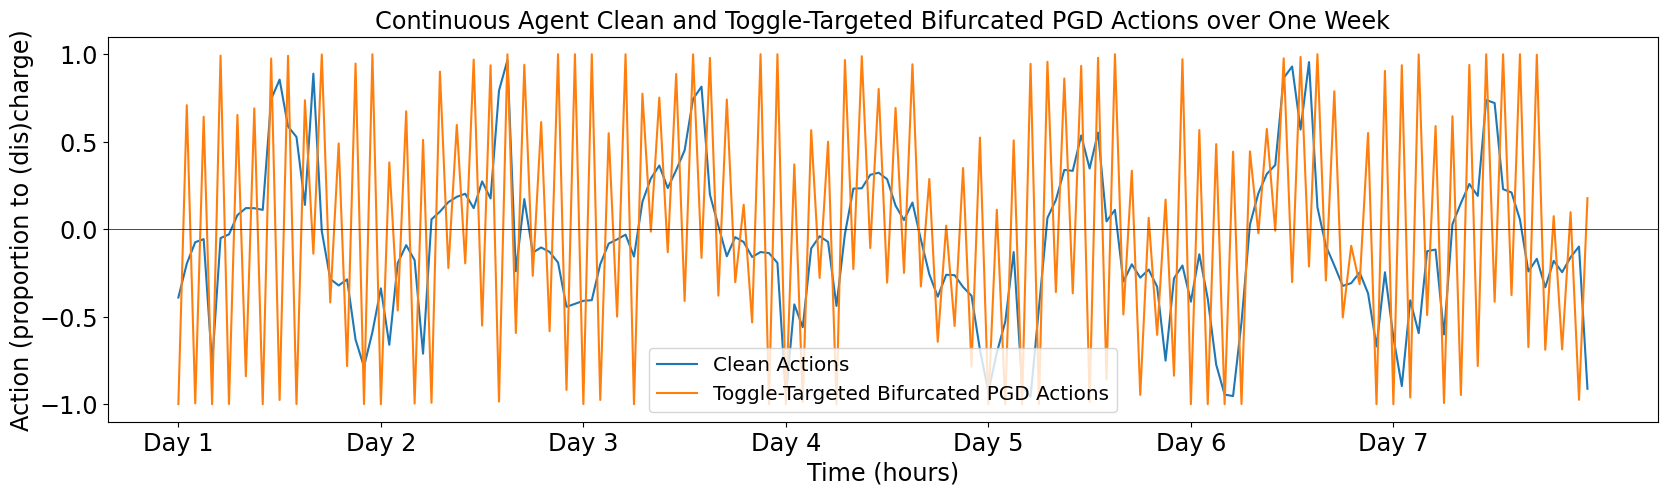

In [22]:
start = 0*7*24
ax = df_a[['continuous_toggle_clean_actions','continuous_toggle_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
        ylabel='Action (proportion to (dis)charge)',
        title='Continuous Agent Clean and Toggle-Targeted Bifurcated PGD Actions over One Week',
        xlabel='Time (hours)'
        )
ax.set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
ax.legend(['Clean Actions','Toggle-Targeted Bifurcated PGD Actions'])
plt.axhline(0, color='black', linewidth=0.5)


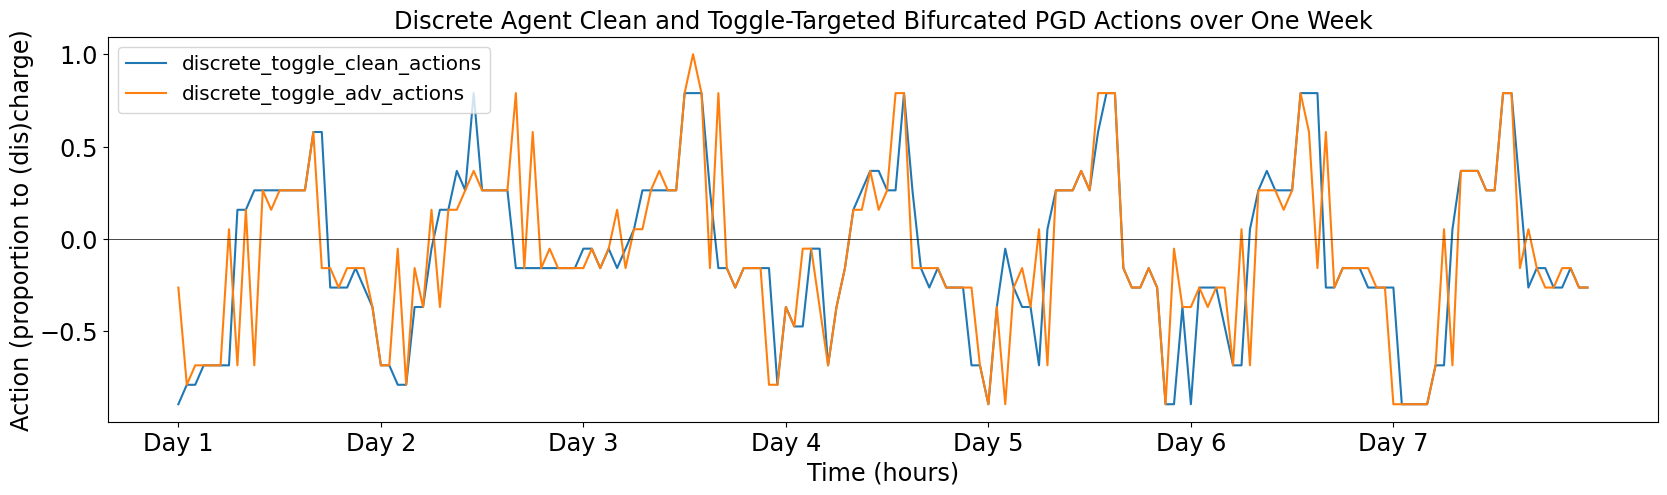

In [23]:
start = 0*7*24
df_a[['discrete_toggle_clean_actions','discrete_toggle_adv_actions']].iloc[start:start+PERIOD].plot.line(
        figsize=(20,5),
    ylabel='Action (proportion to (dis)charge)',
    title='Discrete Agent Clean and Toggle-Targeted Bifurcated PGD Actions over One Week',
    xlabel='Time (hours)'
    ).set_xticks(ticks=range(0,PERIOD,24),
                 labels=['Day ' + str(i+1) for i in range(DAYS)])
plt.axhline(0, color='black', linewidth=0.5)